In [1]:
import itertools
import os

from sklearn.metrics import confusion_matrix
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from PIL import Image
from PIL import Image
from sklearn import metrics
import numpy as np
from IPython.display import display

# Part A

In [2]:
path = "input/P2/D1/Skin-NonSkin.txt"
X_data = []
y_data = []
with open(path) as f:
    for line in f:
        if line.__contains__("ID") or line.__contains__("#"):
            continue
        parts = line.split("	")

        X_data.append([int(parts[2]), int(parts[1]), int(parts[1])])
        y_data.append(int(parts[3]))

X_data = np.array(X_data) / 255
y_data = np.array(y_data)
y_data[[y_data == 2]] = 0
X_data

C:\Users\KASHANI\AppData\Local\Temp\ipykernel_18764\2331722204.py:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  y_data[[y_data == 2]] = 0


array([[0.48235294, 0.33333333, 0.33333333],
       [0.47843137, 0.32941176, 0.32941176],
       [0.4745098 , 0.3254902 , 0.3254902 ],
       ...,
       [0.43921569, 0.63529412, 0.63529412],
       [0.43921569, 0.63529412, 0.63529412],
       [1.        , 1.        , 1.        ]])

convert BGR to RGB

In [3]:
y_data

array([1, 1, 1, ..., 0, 0, 0])

In [4]:
# Train a GMM for each class
gmm_class1 = GaussianMixture(n_components=5, covariance_type='full',
                             ).fit(X_data[y_data == 0])
gmm_class2 = GaussianMixture(n_components=2, covariance_type='full',
                             ).fit(X_data[y_data == 1])

# Part B

In [5]:
# Open the image
list_of_photos = ["920480_f520", "0520962400", "chenhao0017me9", "f_family", "family_bible_study", "Family_Bryce",
                  "FamilyPhoto07", "friends", "large_Chapman-family", "m(01-32)_gr", "RoundsFamily", "vick-family"]

In [6]:
file_name = list_of_photos[-3]
img = Image.open(f"input/P2/D2/images/{file_name}.jpg")
# Convert the image to a NumPy array
img_array_RGB = np.array(img)

In [7]:

# Open the image

img = Image.open(f"input/P2/D2/groundtruth/{file_name}.png").convert("L")

# Convert the image to a NumPy array
gray_img_array = np.array(img, dtype=float)

# Convert the array to binary values
gray_img_array = (gray_img_array > 128).astype(int)

In [8]:
m, n, _ = img_array_RGB.shape

img_array_RGB = img_array_RGB.reshape(-1, 3)
img_array_RGB = img_array_RGB.astype('float64') / 255
gray_img_array = gray_img_array.reshape(-1)

# Calculate likelihood of each test sample for each class
log_prob_class1 = gmm_class1.score_samples(img_array_RGB)
log_prob_class2 = gmm_class2.score_samples(img_array_RGB)

# Assign the class label with the highest likelihood
y_pred = np.argmax(np.stack([log_prob_class1, log_prob_class2]), axis=0)

# Calculate accuracy
accuracy = np.mean(y_pred == gray_img_array)
print(f"Accuracy {file_name}: {accuracy}")

Accuracy m(01-32)_gr: 0.8679140625


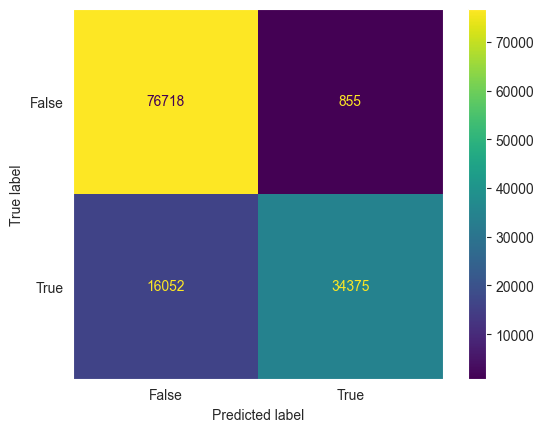

In [9]:
# Compute the confusion matrix
cm = confusion_matrix(gray_img_array, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

cm_display.plot()
plt.grid(False)
plt.show()

In [10]:
y_pred = y_pred * 255
y_pred = y_pred.reshape((m, n))
y_pred

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

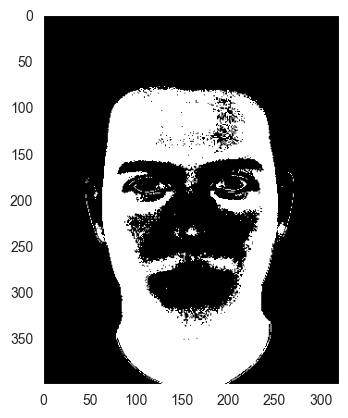

In [11]:
plt.imshow(y_pred, cmap='gray')
plt.grid(False)
plt.show()

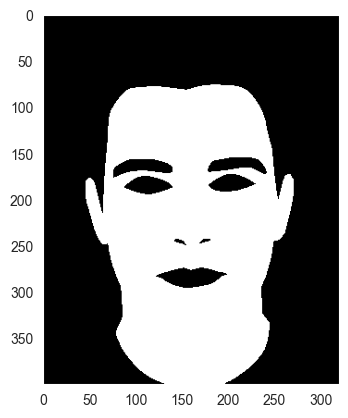

In [136]:
plt.imshow(gray_img_array.reshape(m, n), cmap='gray')
plt.grid(False)
plt.show()

In [137]:
def GNB_function(file_name):
    img = Image.open(f"input/P2/D2/images/{file_name}.jpg")
    # Convert the image to a NumPy array
    img_array_RGB = np.array(img)

    # Open the image

    img = Image.open(f"input/P2/D2/groundtruth/{file_name}.png").convert("L")

    # Convert the image to a NumPy array
    gray_img_array = np.array(img, dtype=float)

    # Convert the array to binary values
    gray_img_array = (gray_img_array > 128).astype(int)
    m, n, _ = img_array_RGB.shape

    img_array_RGB = img_array_RGB.reshape(-1, 3)
    img_array_RGB = img_array_RGB.astype('float64') / 255
    gray_img_array = gray_img_array.reshape(-1)

    # Calculate likelihood of each test sample for each class
    log_prob_class1 = gmm_class1.score_samples(img_array_RGB)
    log_prob_class2 = gmm_class2.score_samples(img_array_RGB)

    # Assign the class label with the highest likelihood
    y_pred = np.argmax(np.stack([log_prob_class1, log_prob_class2]), axis=0)

    # Calculate accuracy
    accuracy = np.mean(y_pred == gray_img_array)
    print(f"Accuracy {file_name}: {accuracy}")
    # Compute the confusion matrix
    cm = confusion_matrix(gray_img_array, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

    cm_display.plot()

    plt.grid(False)
    plt.savefig(f'saves/GMM/GMM_confusion_{file_name}')
    plt.show()
    y_pred = y_pred * 255
    y_pred = y_pred.reshape((m, n))
    plt.imshow(y_pred, cmap='gray')
    plt.grid(False)
    plt.savefig(f'saves/GMM//GMM_GrayScales_{file_name}')
    # plt.show()

In [138]:
list_of_photos

['920480_f520',
 '0520962400',
 'chenhao0017me9',
 'f_family',
 'family_bible_study',
 'Family_Bryce',
 'FamilyPhoto07',
 'friends',
 'large_Chapman-family',
 'm(01-32)_gr',
 'RoundsFamily',
 'vick-family']

Accuracy 920480_f520: 0.8022307692307692


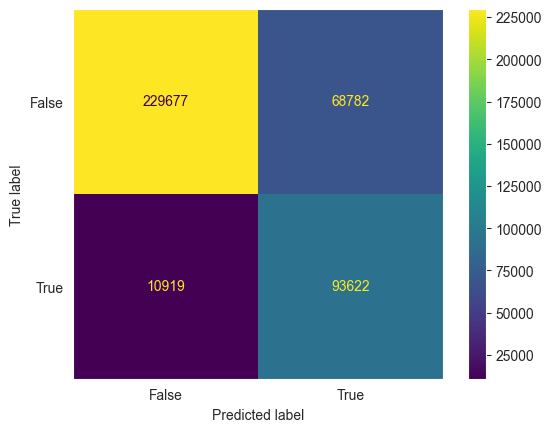

Accuracy 0520962400: 0.5698883047028324


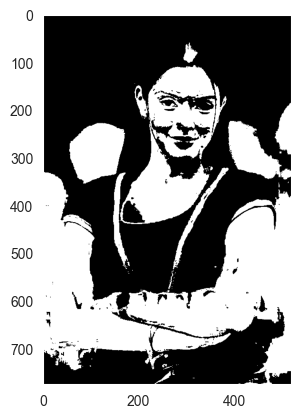

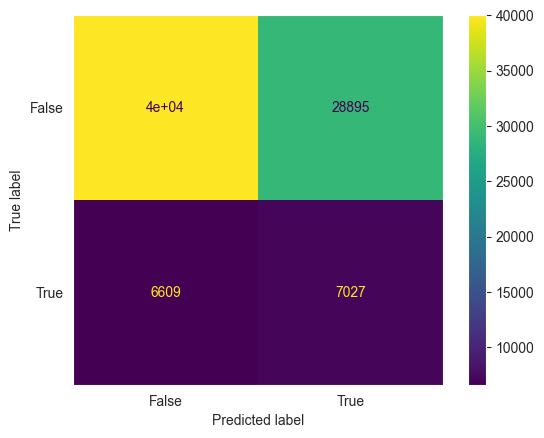

Accuracy chenhao0017me9: 0.9677547325102881


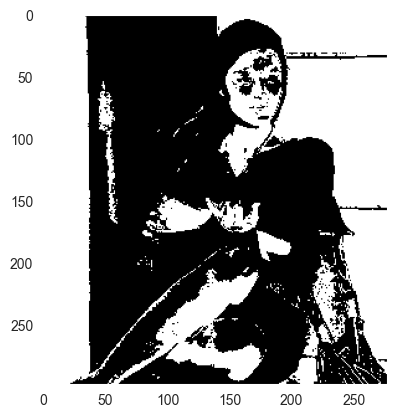

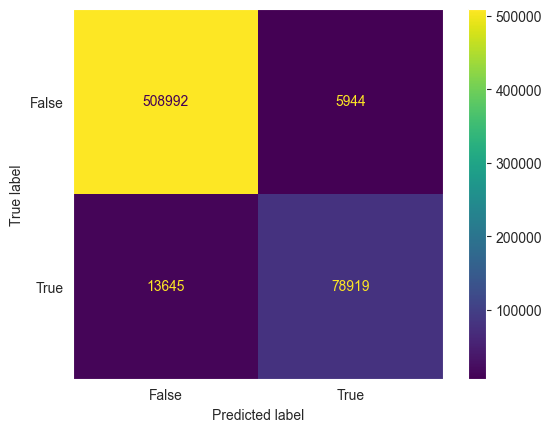

Accuracy f_family: 0.740011768167108


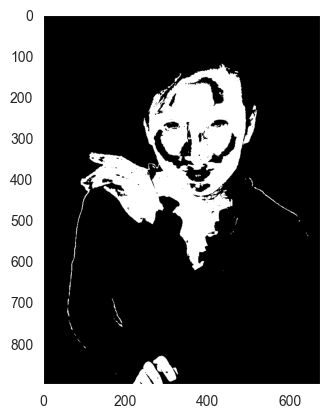

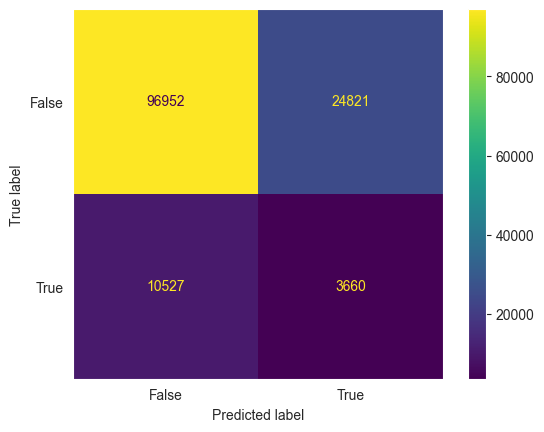

Accuracy family_bible_study: 0.8614071856287425


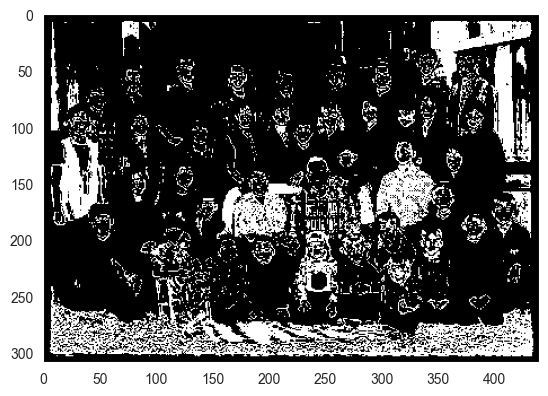

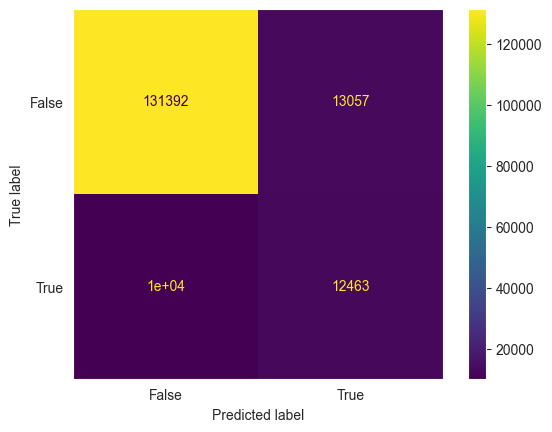

Accuracy Family_Bryce: 0.8042354166666666


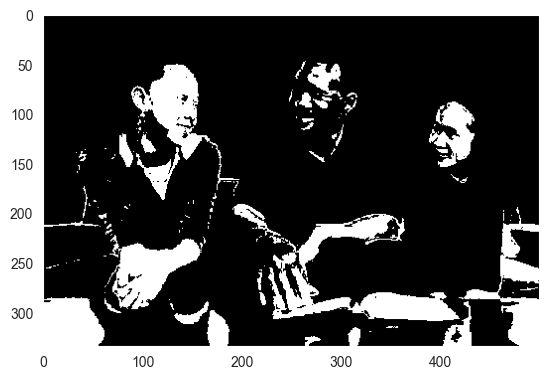

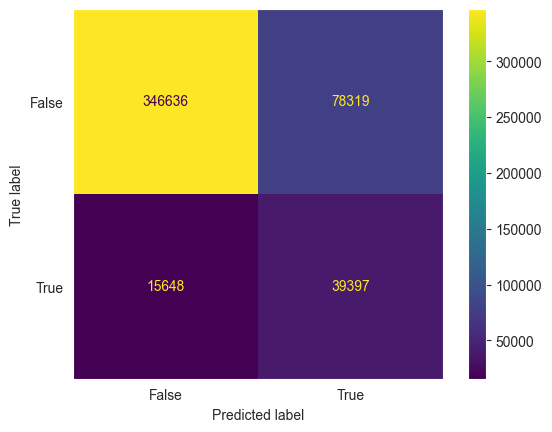

Accuracy FamilyPhoto07: 0.97002002002002


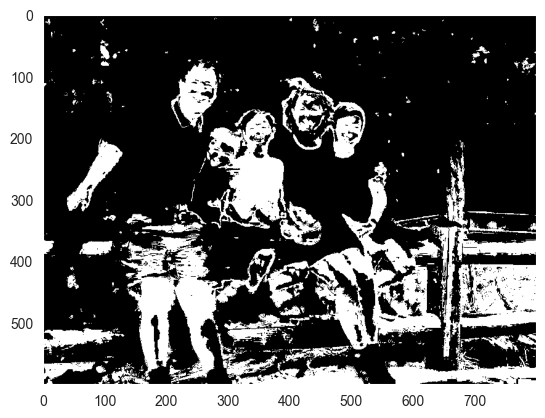

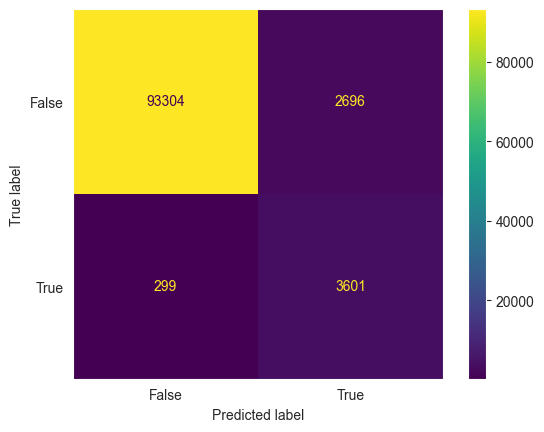

Accuracy friends: 0.8222978723404255


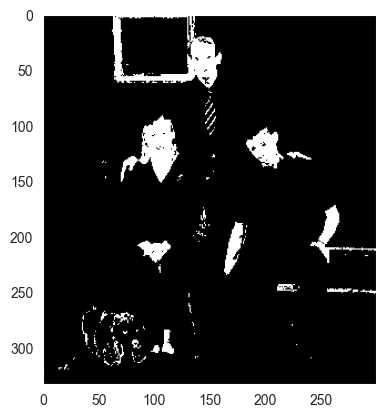

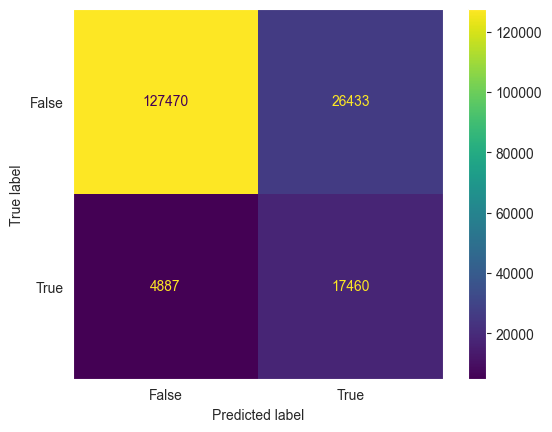

Accuracy large_Chapman-family: 0.5428680354430692


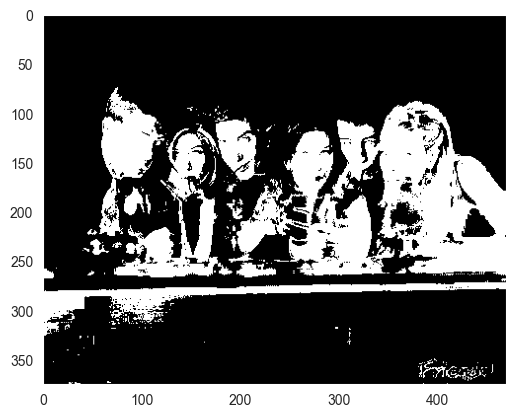

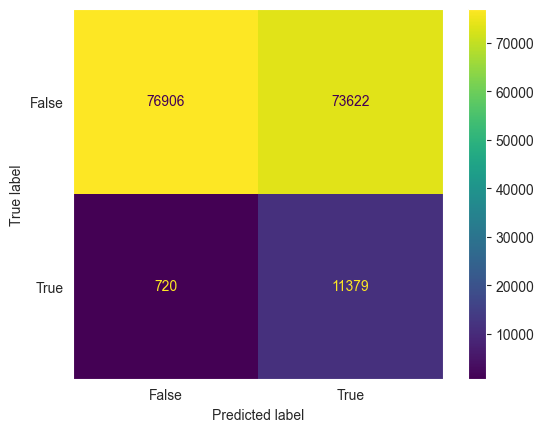

Accuracy m(01-32)_gr: 0.9074765625


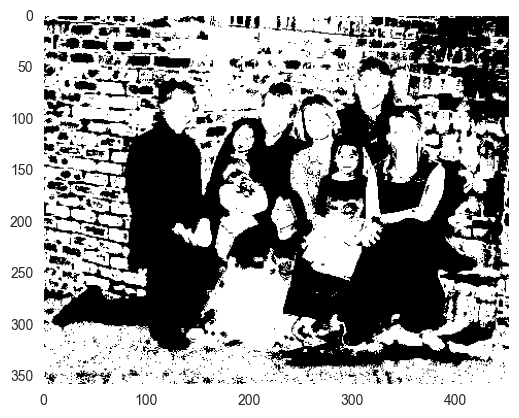

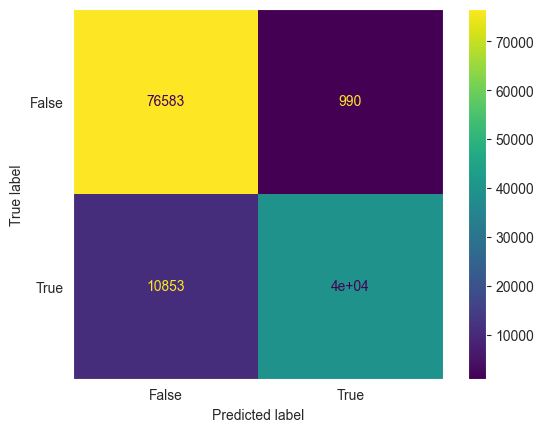

Accuracy RoundsFamily: 0.5577057831221074


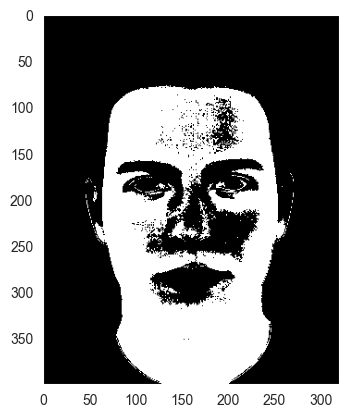

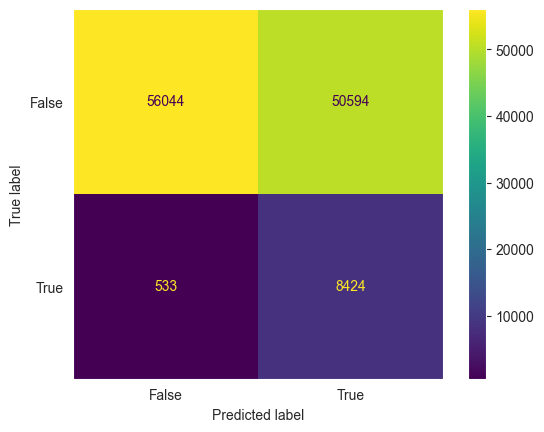

Accuracy vick-family: 0.8115245478036176


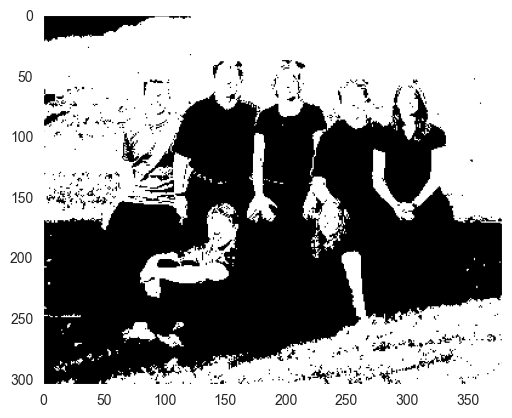

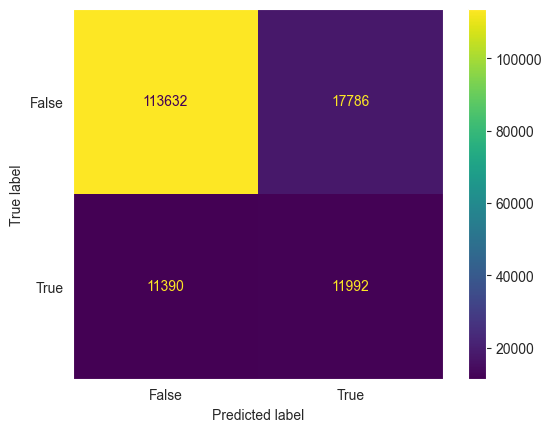

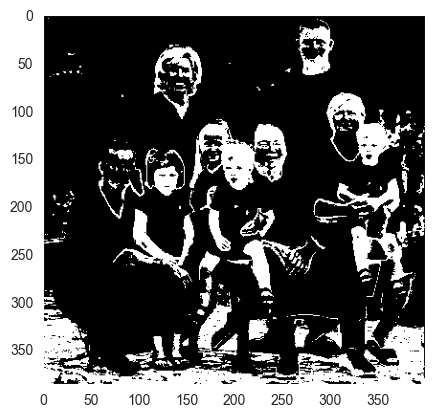

In [139]:
for name in list_of_photos:
    GNB_function(name)

# part C

In [95]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
_ = gnb.fit(X_data, y_data)


In [140]:
def bayes_classifier_function(file_name, model):
    img = Image.open(f"input/P2/D2/images/{file_name}.jpg")
    # Convert the image to a NumPy array
    img_array_RGB = np.array(img)

    # Open the image
    img = Image.open(f"input/P2/D2/groundtruth/{file_name}.png").convert("L")

    # Convert the image to a NumPy array
    gray_img_array = np.array(img, dtype=float)

    # Convert the array to binary values
    gray_img_array = (gray_img_array > 128).astype(int)
    m, n, _ = img_array_RGB.shape

    img_array_RGB = img_array_RGB.reshape(-1, 3)
    img_array_RGB = img_array_RGB.astype('float64') / 255
    gray_img_array = gray_img_array.reshape(-1)

    y_pred = model.predict(img_array_RGB)

    # Calculate accuracy
    accuracy = np.mean(y_pred == gray_img_array)
    print(f"Accuracy {file_name}: {accuracy}")
    # Compute the confusion matrix
    cm = confusion_matrix(gray_img_array, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

    cm_display.plot()

    plt.grid(False)
    plt.savefig(f'saves/GNB/GNB_confusion_{file_name}')
    plt.show()
    y_pred = y_pred * 255
    y_pred = y_pred.reshape((m, n))
    plt.imshow(y_pred, cmap='gray')
    plt.grid(False)
    plt.savefig(f'saves/GNB//GNB_GrayScales_{file_name}')
    # plt.show()


Accuracy 920480_f520: 0.7945161290322581


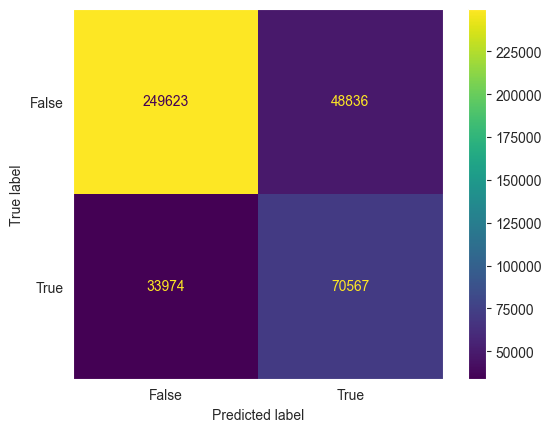

Accuracy 0520962400: 0.6717103190948077


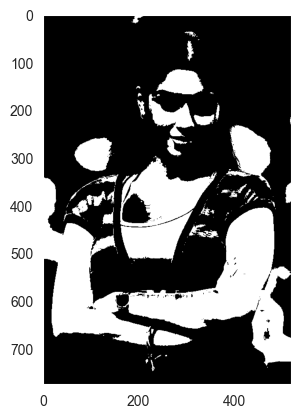

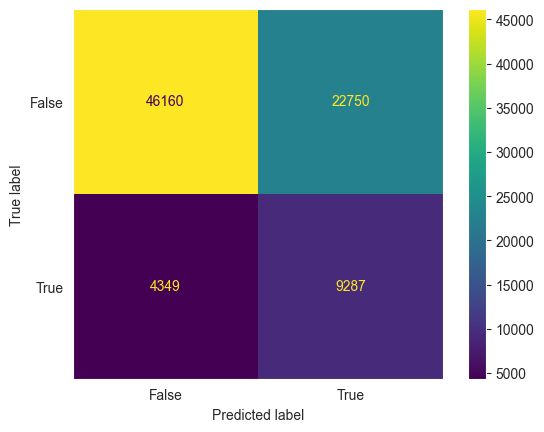

Accuracy chenhao0017me9: 0.9443275720164609


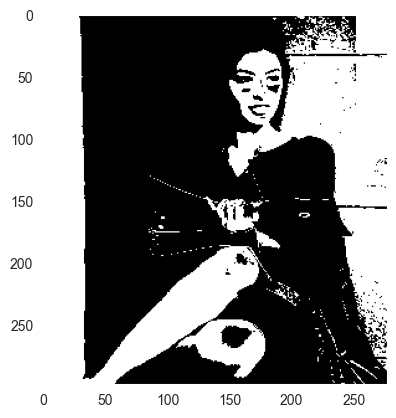

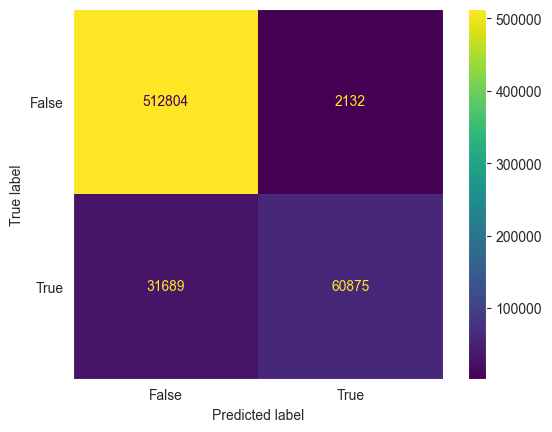

Accuracy f_family: 0.7981685789938218


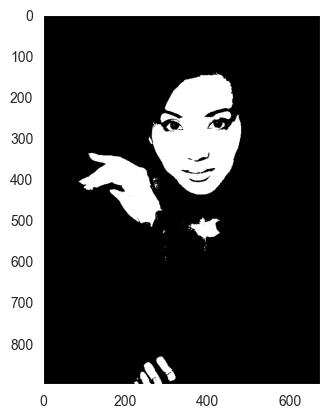

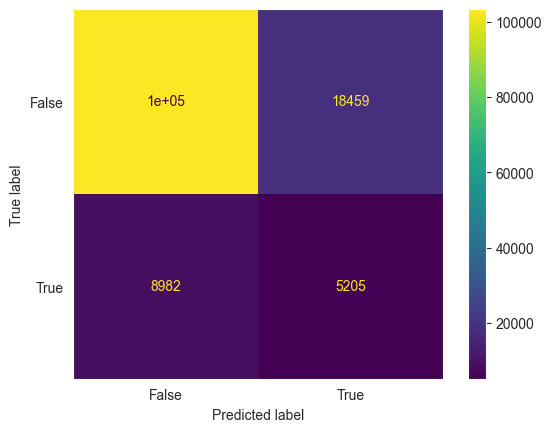

Accuracy family_bible_study: 0.5442455089820359


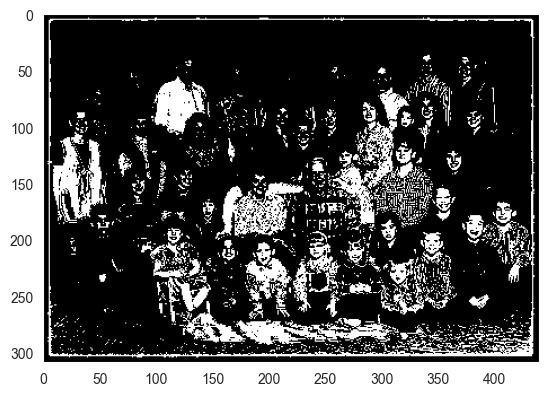

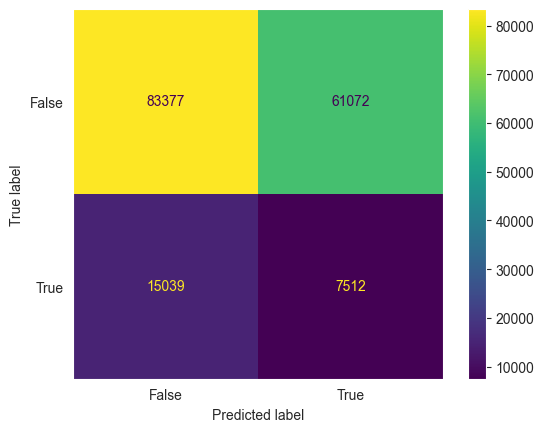

Accuracy Family_Bryce: 0.8453458333333334


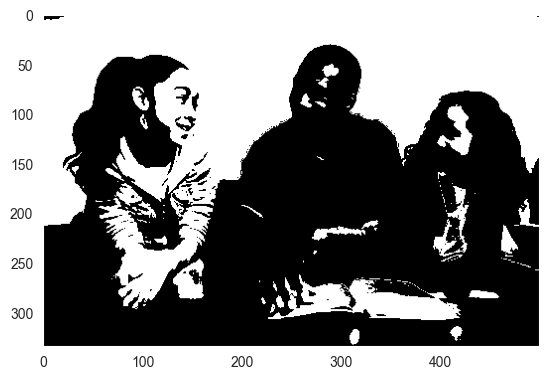

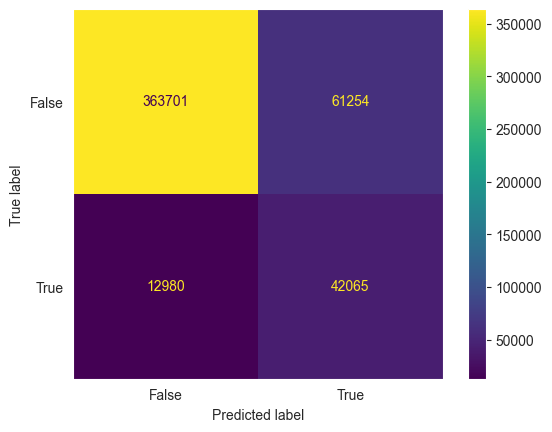

Accuracy FamilyPhoto07: 0.8255355355355355


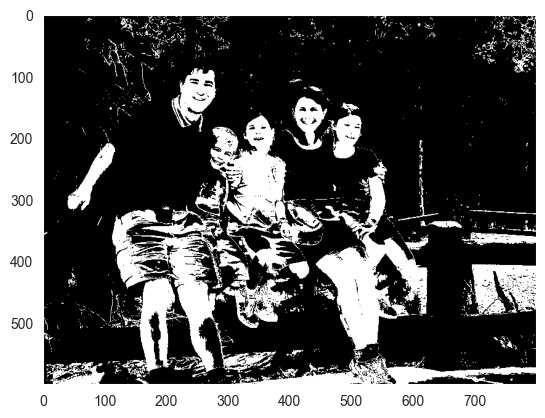

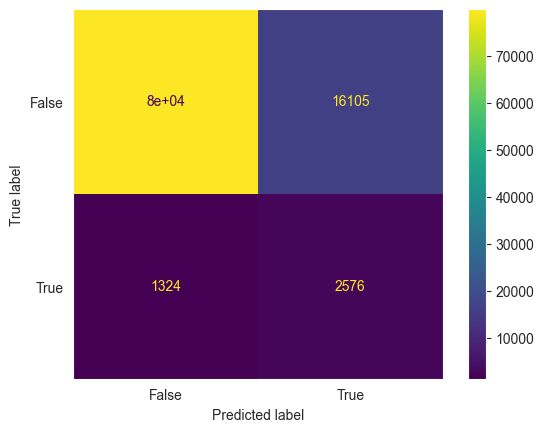

Accuracy friends: 0.5549957446808511


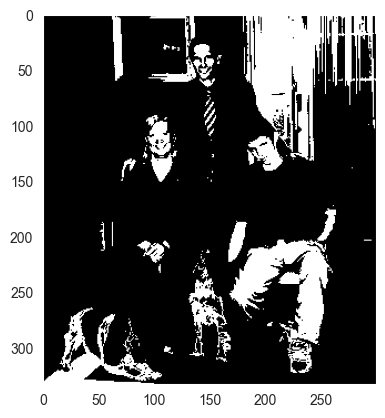

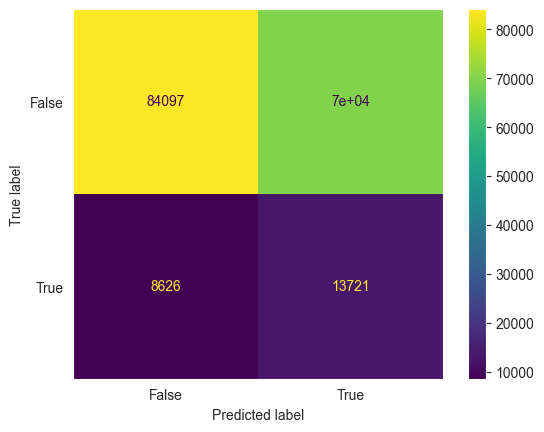

Accuracy large_Chapman-family: 0.8918629747827852


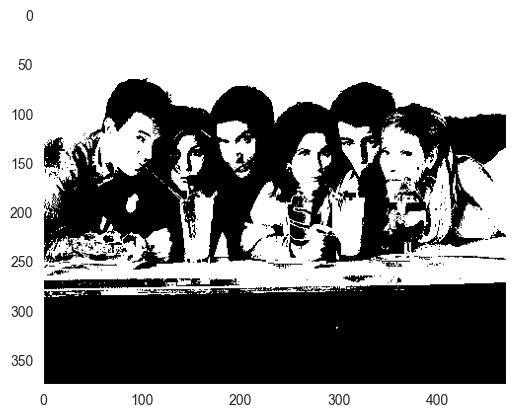

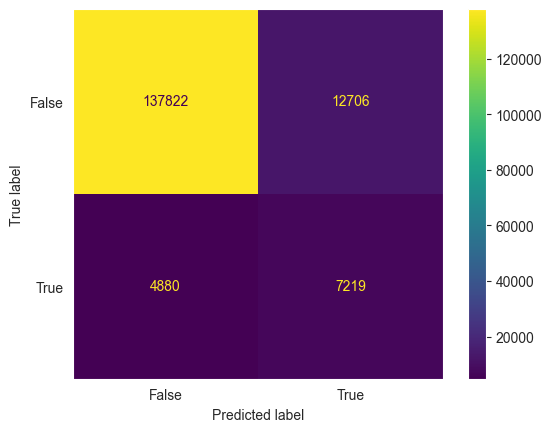

Accuracy m(01-32)_gr: 0.72053125


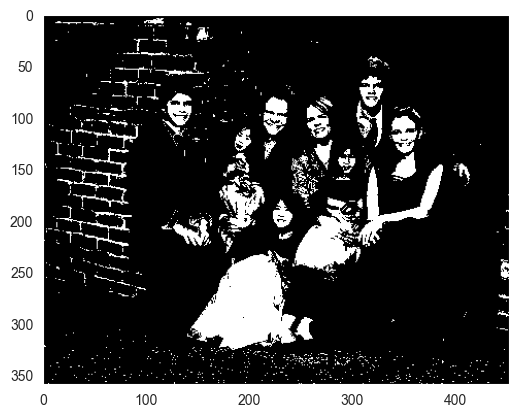

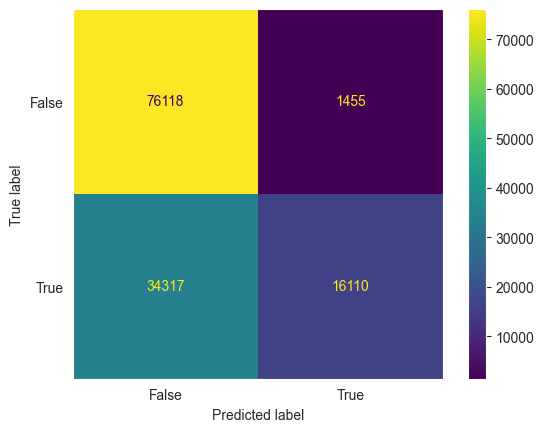

Accuracy RoundsFamily: 0.8687140447251178


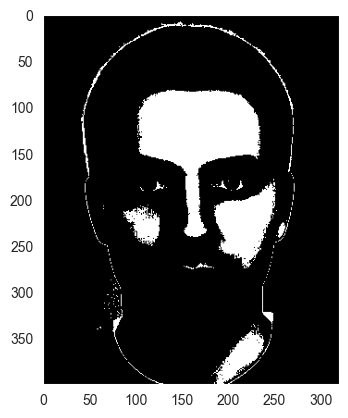

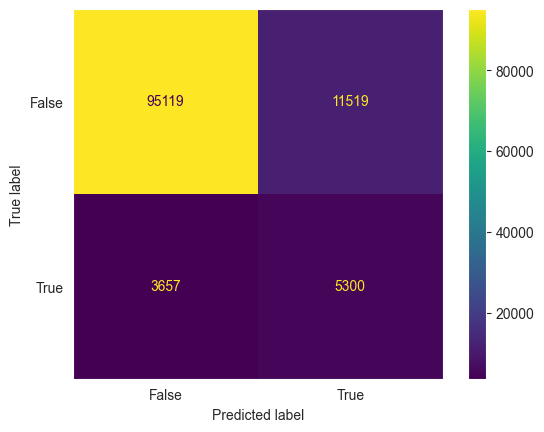

Accuracy vick-family: 0.6759173126614987


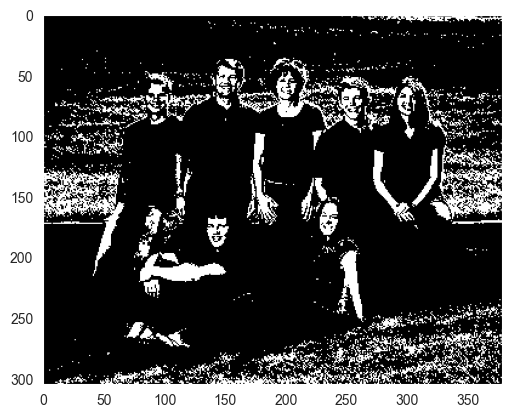

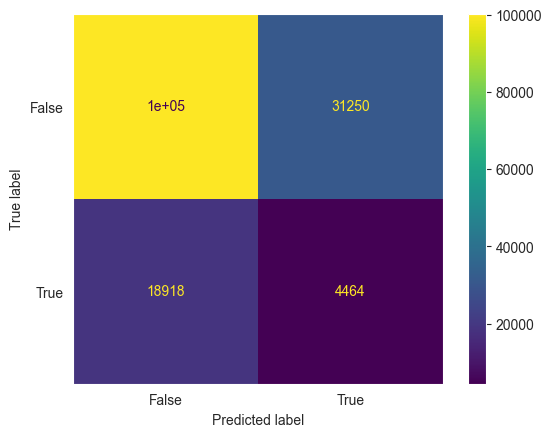

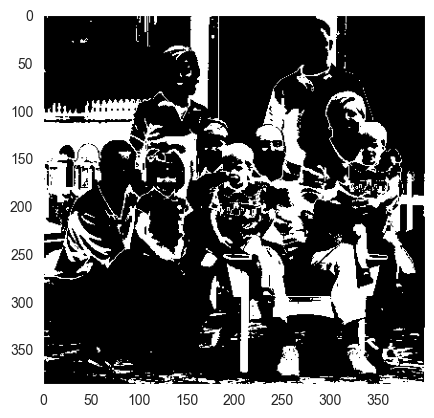

In [141]:

for name in list_of_photos:
    bayes_classifier_function(name, gnb)

# part D

In [142]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
_ = gnb.fit(X_data, y_data)

In [143]:


def bayes_classifier_function(file_name):
    img = Image.open(f"input/P2/D2/images/{file_name}.jpg")
    # Convert the image to a NumPy array
    img_array_RGB = np.array(img)

    # Open the image

    img = Image.open(f"input/P2/D2/groundtruth/{file_name}.png").convert("L")

    # Convert the image to a NumPy array
    gray_img_array = np.array(img, dtype=float)

    # Convert the array to binary values
    gray_img_array = (gray_img_array > 128).astype(int)
    m, n, _ = img_array_RGB.shape

    img_array_RGB = img_array_RGB.reshape(-1, 3)
    img_array_RGB = img_array_RGB.astype('float64') / 255
    gray_img_array = gray_img_array.reshape(-1)

    y_pred = gnb.predict_proba(img_array_RGB)
    y_pred = y_pred[:, 1]

    y_pred = y_pred * 255
    y_pred = y_pred.reshape((m, n))
    plt.imshow(y_pred, cmap='gray')
    plt.grid(False)
    plt.savefig(f'saves/soft/soft_GrayScales_{file_name}')
    plt.show()


920480_f520


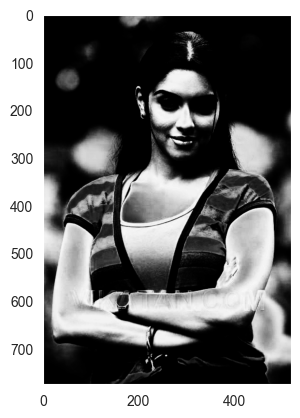

0520962400


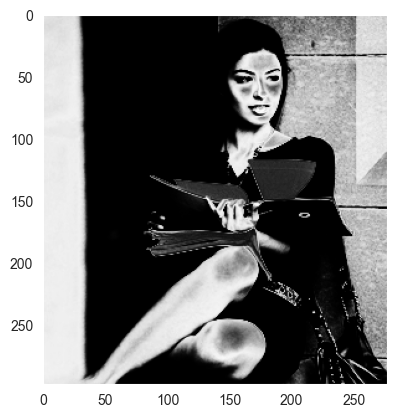

chenhao0017me9


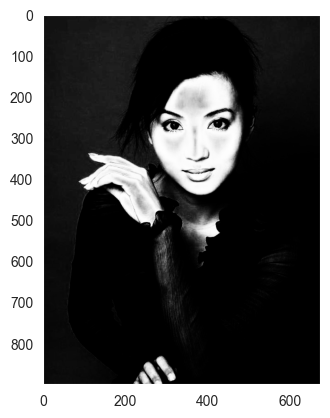

f_family


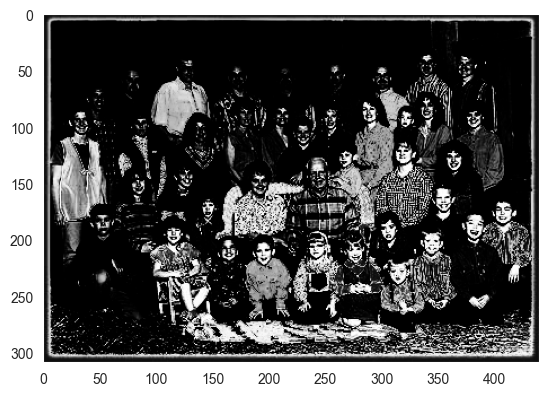

family_bible_study


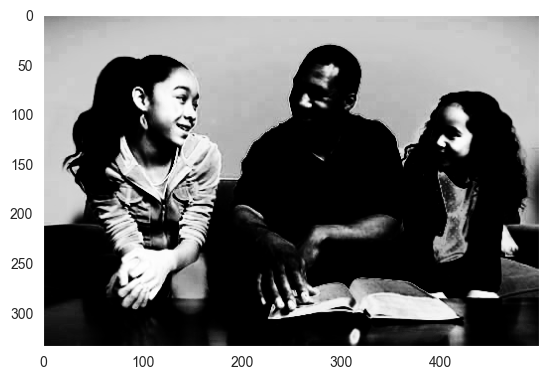

Family_Bryce


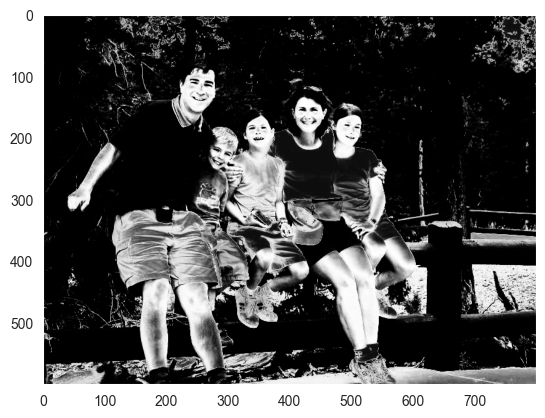

FamilyPhoto07


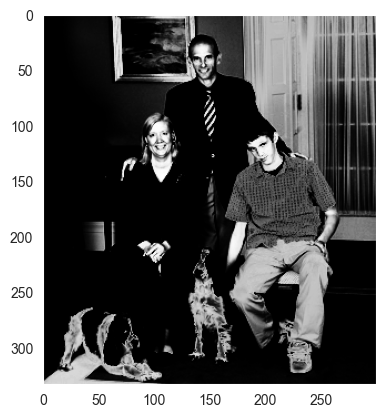

friends


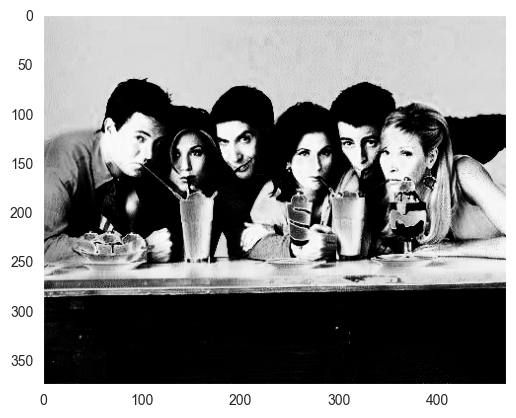

large_Chapman-family


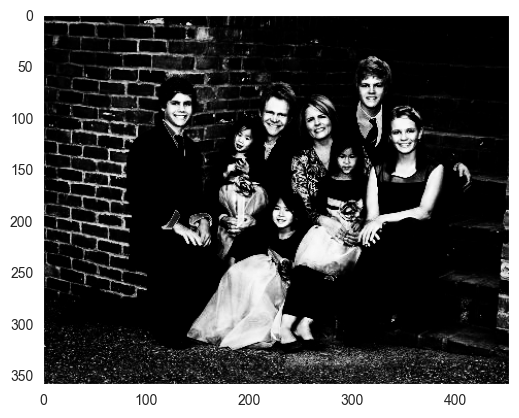

m(01-32)_gr


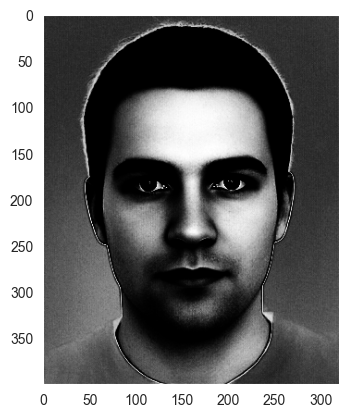

RoundsFamily


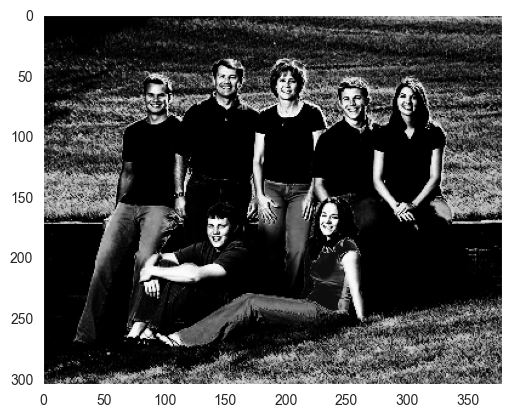

vick-family


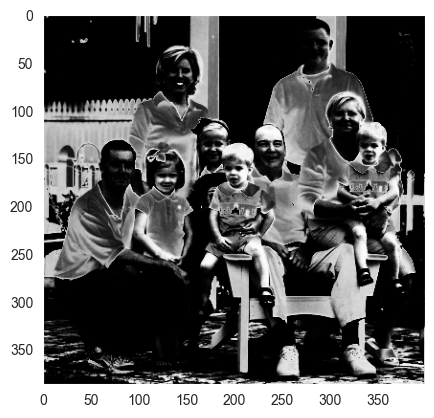

In [144]:
for name in list_of_photos:
    print(name)
    bayes_classifier_function(name)

# part e

In [39]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
_ = gnb.fit(X_data, y_data)

In [40]:
# if u path a list of prev converted datas can add more labels to that
def convert_image_to_12D(dir, file_name, result=[]):
    img = Image.open(f"{dir}{file_name}.jpg")
    # Convert the image to a NumPy array
    img_array_RGB = np.array(img)
    X_size, Y_size, _ = img_array_RGB.shape

    img_array_RGB = img_array_RGB.reshape(-1, 3)
    img_array_RGB = img_array_RGB.astype('float64') / 255

    y_pred = gnb.predict_proba(img_array_RGB)
    y_pred = y_pred[:, 0]

    y_pred = y_pred.reshape((X_size, Y_size))
    # now y pred is probably of each cell

    # convert img_array to original size
    img_array_RGB = img_array_RGB.reshape((X_size, Y_size, -1))

    # add zero padding for border points
    y_pred_by_padding = np.pad(y_pred, (2, 2))

    padding_shift = 2

    for i in range(X_size):
        for j in range(Y_size):
            pixel_12_D = []
            pixel_12_D.append(img_array_RGB[i, j, 0])
            pixel_12_D.append(img_array_RGB[i, j, 1])
            pixel_12_D.append(img_array_RGB[i, j, 2])
            pixel_12_D.append(y_pred_by_padding[i + padding_shift, j + padding_shift])  # cell pred
            pixel_12_D.append(y_pred_by_padding[i + padding_shift - 1, j + padding_shift - 1])  # 1 up 1 left
            pixel_12_D.append(y_pred_by_padding[i + padding_shift - 1, j + padding_shift])  # 1 up
            pixel_12_D.append(y_pred_by_padding[i + padding_shift - 1, j + padding_shift + 1])  # 1 up 1 right
            pixel_12_D.append(y_pred_by_padding[i + padding_shift, j + padding_shift + 1])  # 1 right
            pixel_12_D.append(y_pred_by_padding[i + padding_shift + 1, j + padding_shift + 1])  # 1 right 1 down
            pixel_12_D.append(y_pred_by_padding[i + padding_shift + 1, j + padding_shift])  # 1 down
            pixel_12_D.append(y_pred_by_padding[i + padding_shift + 1, j + padding_shift - 1])  # 1 down 1 left
            pixel_12_D.append(y_pred_by_padding[i + padding_shift, j + padding_shift - 1])  # left
            pixel_12_D = np.array(pixel_12_D, dtype=np.float32)
            result.append(pixel_12_D)

    return result

In [41]:
# if u path a list of prev converted datas can add more labels to that
def convert_image_to_12D_log_proba(dir, file_name, result=[]):
    img = Image.open(f"{dir}{file_name}.jpg")
    # Convert the image to a NumPy array
    img_array_RGB = np.array(img)
    X_size, Y_size, _ = img_array_RGB.shape

    img_array_RGB = img_array_RGB.reshape(-1, 3)
    img_array_RGB = img_array_RGB.astype('float64') / 255

    y_pred = gnb.predict_log_proba(img_array_RGB)
    y_pred = y_pred[:, 0]

    y_pred = y_pred.reshape((X_size, Y_size))
    # now y pred is probably of each cell

    # convert img_array to original size
    img_array_RGB = img_array_RGB.reshape((X_size, Y_size, -1))

    # add zero padding for border points
    y_pred_by_padding = np.pad(y_pred, (2, 2))

    padding_shift = 2

    for i in range(X_size):
        for j in range(Y_size):
            pixel_12_D = []
            pixel_12_D.append(img_array_RGB[i, j, 0])
            pixel_12_D.append(img_array_RGB[i, j, 1])
            pixel_12_D.append(img_array_RGB[i, j, 2])
            pixel_12_D.append(y_pred_by_padding[i + padding_shift, j + padding_shift])  # cell pred
            pixel_12_D.append(y_pred_by_padding[i + padding_shift - 1, j + padding_shift - 1])  # 1 up 1 left
            pixel_12_D.append(y_pred_by_padding[i + padding_shift - 1, j + padding_shift])  # 1 up
            pixel_12_D.append(y_pred_by_padding[i + padding_shift - 1, j + padding_shift + 1])  # 1 up 1 right
            pixel_12_D.append(y_pred_by_padding[i + padding_shift, j + padding_shift + 1])  # 1 right
            pixel_12_D.append(y_pred_by_padding[i + padding_shift + 1, j + padding_shift + 1])  # 1 right 1 down
            pixel_12_D.append(y_pred_by_padding[i + padding_shift + 1, j + padding_shift])  # 1 down
            pixel_12_D.append(y_pred_by_padding[i + padding_shift + 1, j + padding_shift - 1])  # 1 down 1 left
            pixel_12_D.append(y_pred_by_padding[i + padding_shift, j + padding_shift - 1])  # left
            pixel_12_D = np.array(pixel_12_D, dtype=np.float32)
            result.append(pixel_12_D)

    return result

In [42]:
def make_labels_of_gray_image(dir, file_name, labels=[]):
    img = Image.open(f"{dir}{file_name}.png").convert("L")

    # Convert the image to a NumPy array
    gray_img_array = np.array(img, dtype=float)
    # Convert the array to binary values
    gray_img_array = (gray_img_array < 128).astype(int)

    X_size, Y_size = gray_img_array.shape

    for i in range(X_size):
        for j in range(Y_size):
            labels.append(gray_img_array[i, j])

    return labels

In [43]:
list_of_photo_names = os.listdir("input/P2/pratheepan/groundtruth")

In [44]:
from tqdm import tqdm

X_train = []
y_train = []

counter = 0

for name in list_of_photo_names:
    name = name[:-4]  # remove .jpg
    X_train = convert_image_to_12D("input/P2/pratheepan/images/", name, X_train)
    y_train = make_labels_of_gray_image("input/P2/pratheepan/groundtruth/", name, y_train)
    counter += 1
    print(counter)

X_train = np.array(X_train)
y_train = np.array(y_train)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [45]:
X_train.shape, y_train.shape

((14434047, 12), (14434047,))

# Part F

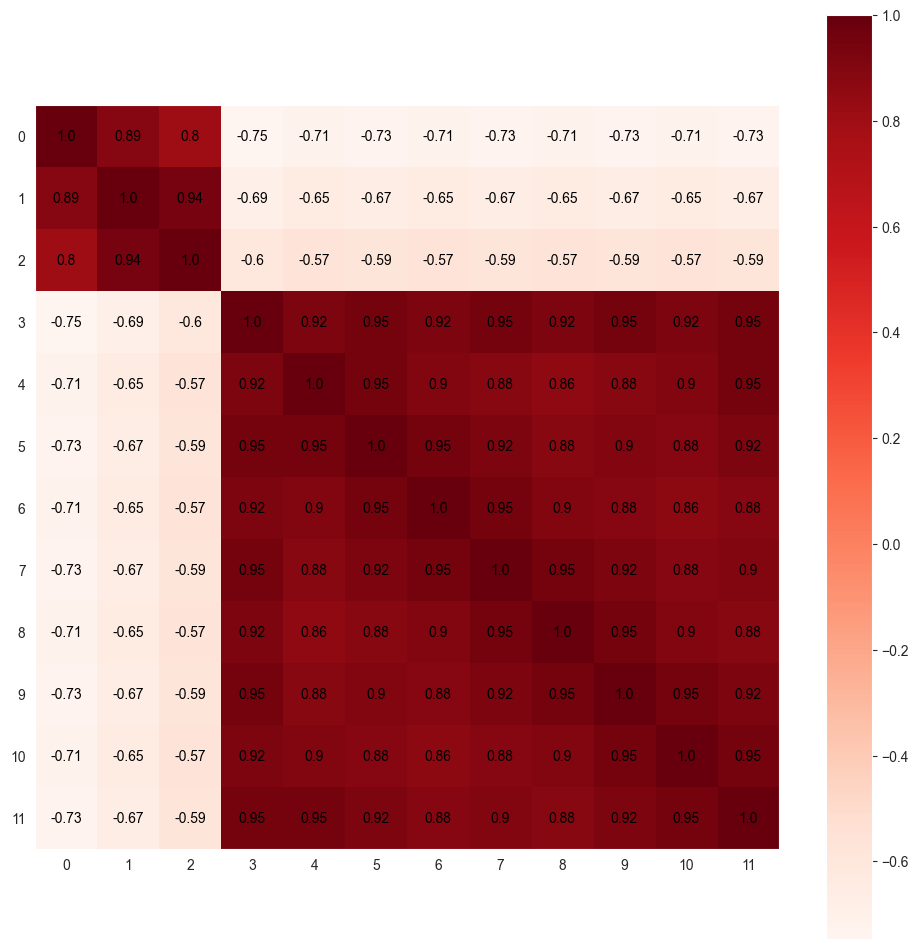

In [46]:
corr_matrix = np.corrcoef(X_train, rowvar=False)

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(corr_matrix, cmap='Reds')
plt.colorbar(im)

# Annotate each block with the corresponding correlation coefficient
for i in range(12):
    for j in range(12):
        text = ax.text(j, i, round(corr_matrix[i, j], 2),
                       ha="center", va="center", color="black")

ax.set_xticks(np.arange(12))
ax.set_yticks(np.arange(12))
plt.grid(False)
plt.show()

# Part E

In [47]:
# from tqdm import tqdm
# X_train = []
# y_train = []
#
# counter = 0
#
# for name in list_of_photo_names:
#     name = name[:-4]  # remove .jpg
#     X_train = convert_image_to_12D_log_proba("input/P2/pratheepan/images/", name, X_train)
#     y_train = make_labels_of_gray_image("input/P2/pratheepan/groundtruth/", name, y_train)
#     counter += 1
#     print(counter)
#
# X_train = np.array(X_train)
# y_train = np.array(y_train)

In [48]:
X_train.shape, y_train.shape

((14434047, 12), (14434047,))

In [49]:
X_train.__class__

numpy.ndarray

In [50]:
def normalize(X_train):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    X_train_norm = (X_train - mean) / std
    return X_train_norm

In [51]:
X_train_norm = normalize(X_train)

In [52]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=20).fit(X_train, y_train)

In [53]:
def bayes_classifier_function(file_name, clf):
    X_test = convert_image_to_12D("input/P2/D2/images/", file_name , [])
    X_test = np.array(X_test)
    y_test = make_labels_of_gray_image("input/P2/D2/groundtruth/", file_name , [])

    img = Image.open(f"input/P2/D2/images/{file_name}.jpg")
    # Convert the image to a NumPy array
    img_array_RGB = np.array(img)
    X_size, Y_size, _ = img_array_RGB.shape
    y_pred = clf.predict(X_test)

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    print(f"Accuracy {file_name}: {accuracy}")
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])

    cm_display.plot()

    plt.grid(False)
    plt.savefig(f'saves/12D_features/12D_confusion_{file_name}')
    plt.show()
    y_pred = (1 - y_pred) * 255
    y_pred = y_pred.reshape((X_size, Y_size))
    plt.imshow(y_pred, cmap='gray')
    plt.grid(False)
    plt.savefig(f'saves/12D_features/12D_features_{file_name}')
    plt.show()

In [54]:
list_of_photos = ["920480_f520", "0520962400", "chenhao0017me9", "f_family", "family_bible_study", "Family_Bryce",
                  "FamilyPhoto07", "friends", "large_Chapman-family", "m(01-32)_gr", "RoundsFamily", "vick-family"]

Accuracy 920480_f520: 0.779498759305211


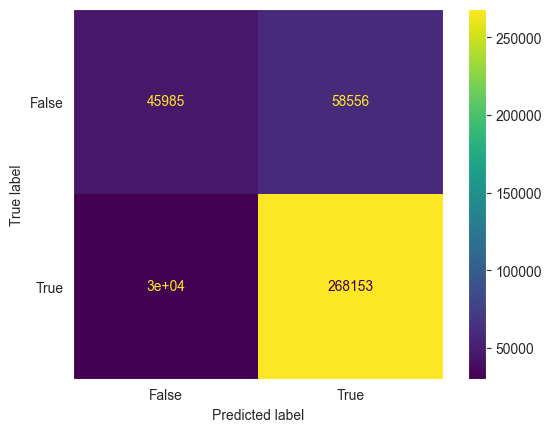

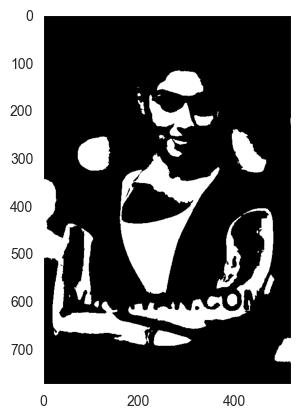

Accuracy 0520962400: 0.7357352264192086


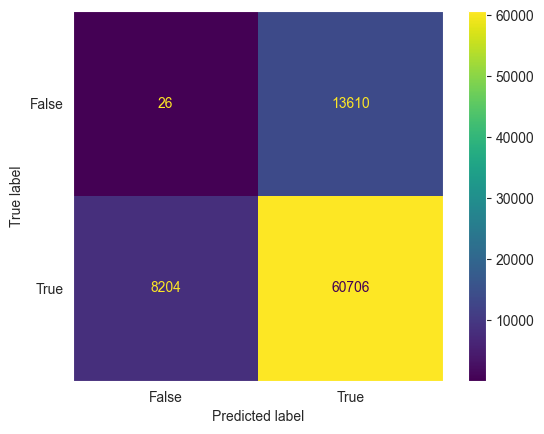

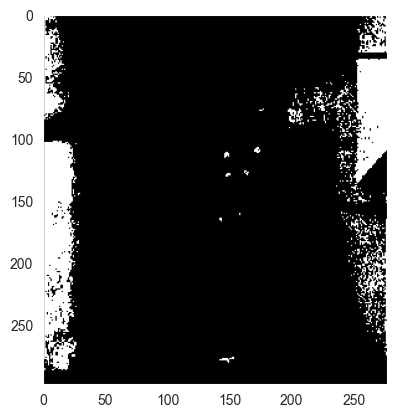

Accuracy chenhao0017me9: 0.8920954732510288


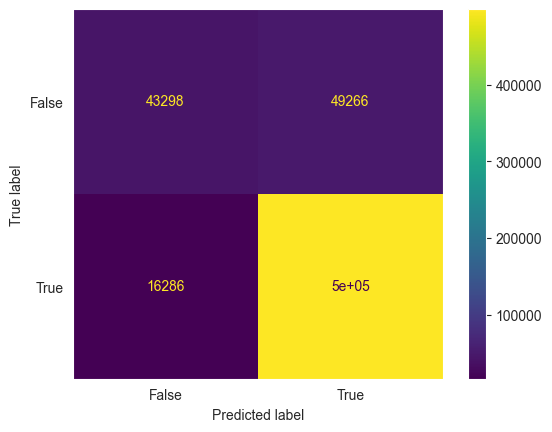

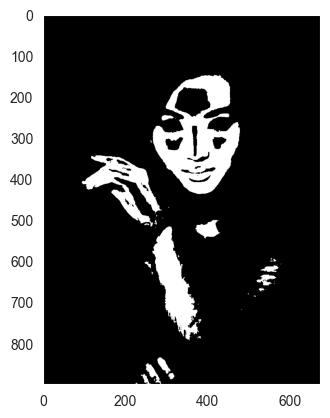

Accuracy f_family: 0.9121285672256546


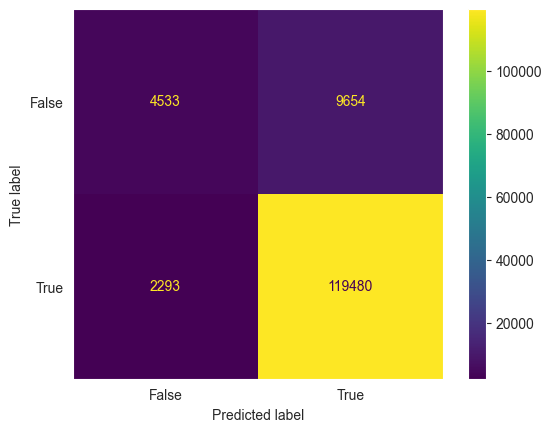

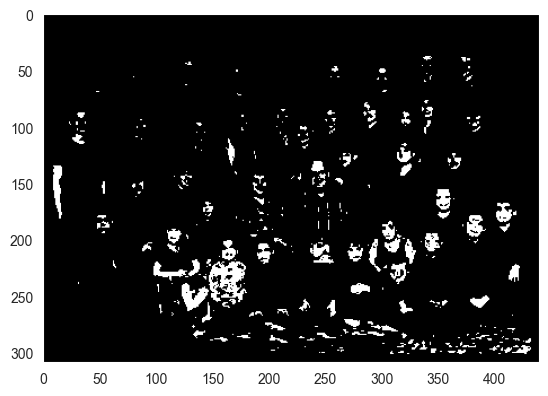

Accuracy family_bible_study: 0.8590419161676647


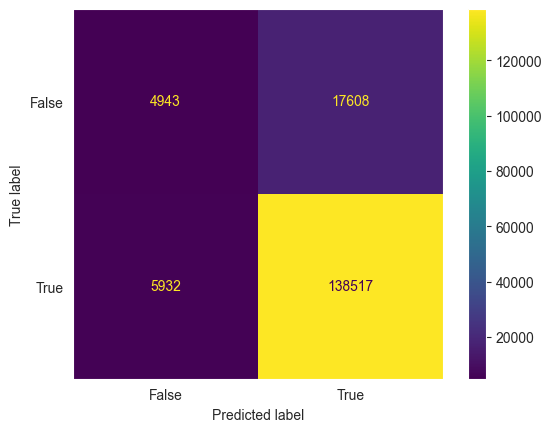

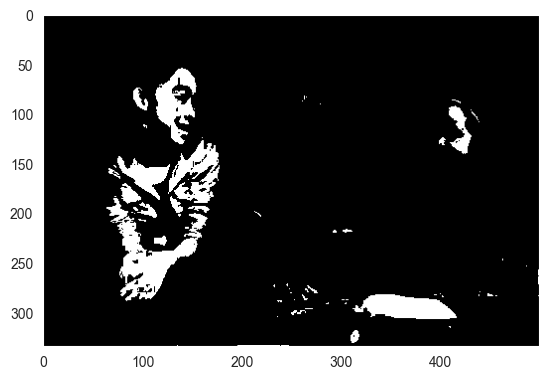

Accuracy Family_Bryce: 0.911875


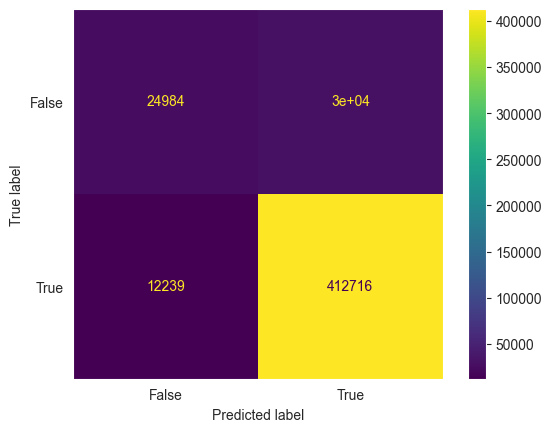

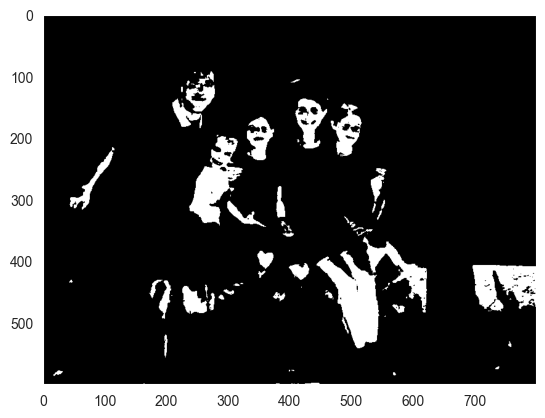

Accuracy FamilyPhoto07: 0.8807507507507507


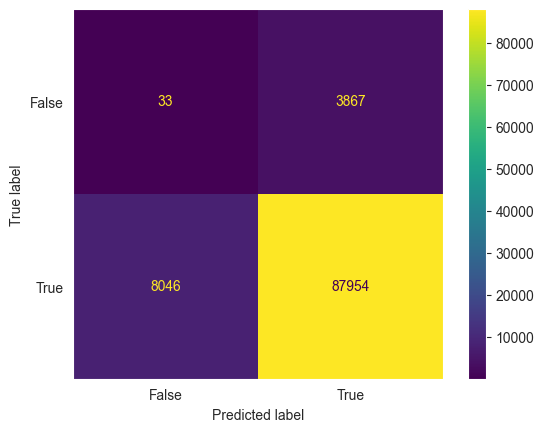

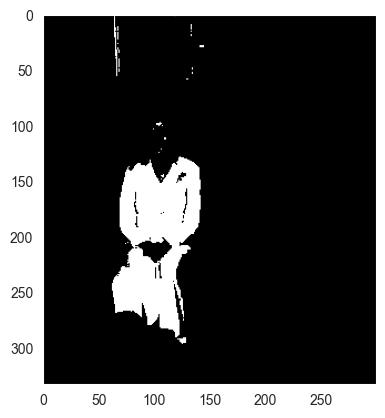

Accuracy friends: 0.912709219858156


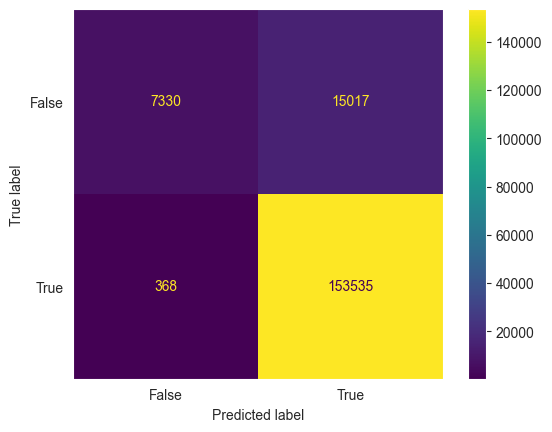

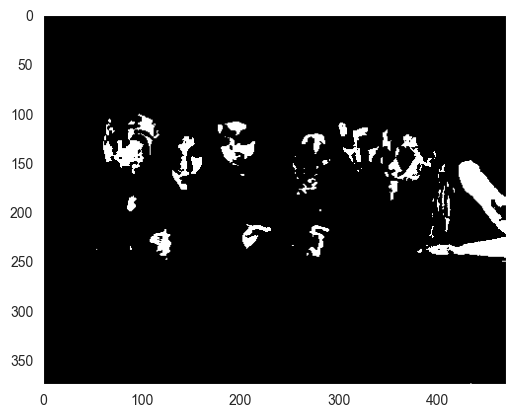

Accuracy large_Chapman-family: 0.9277733709654609


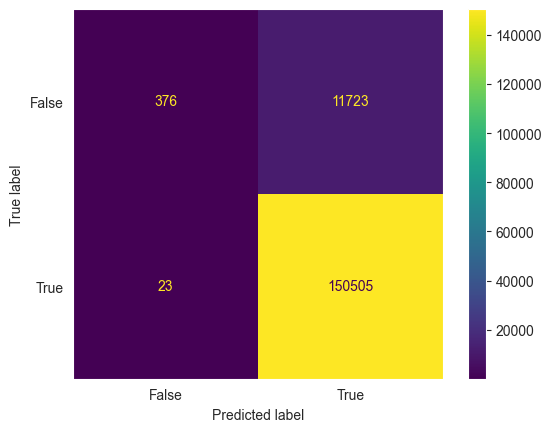

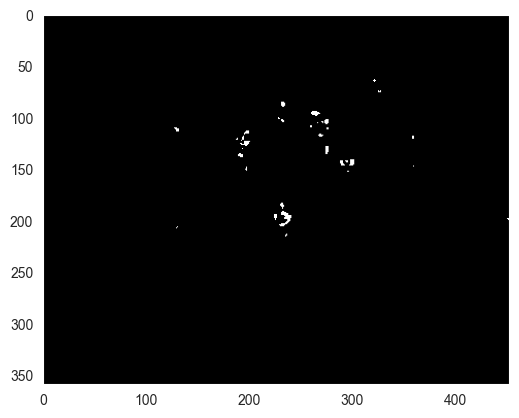

Accuracy m(01-32)_gr: 0.71609375


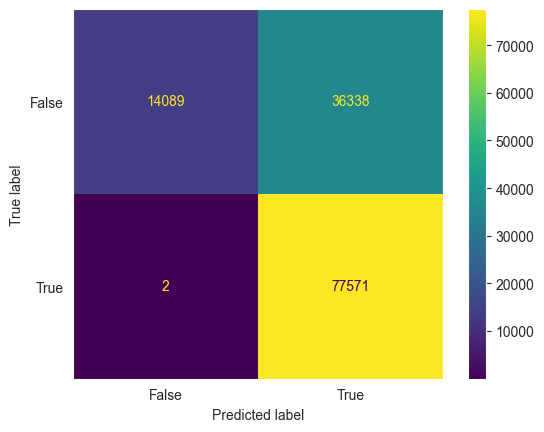

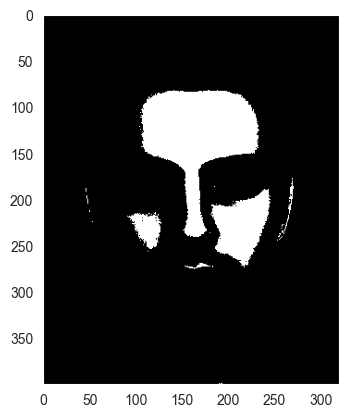

Accuracy RoundsFamily: 0.9047882693888144


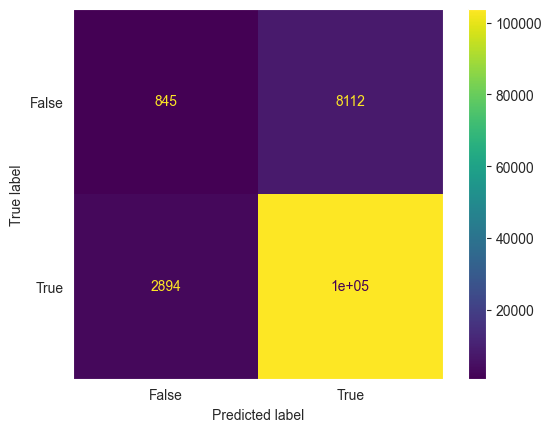

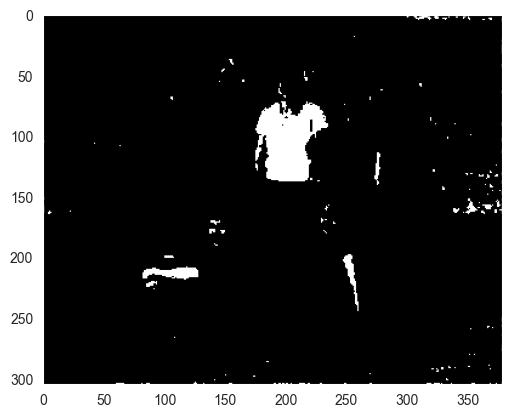

Accuracy vick-family: 0.8591666666666666


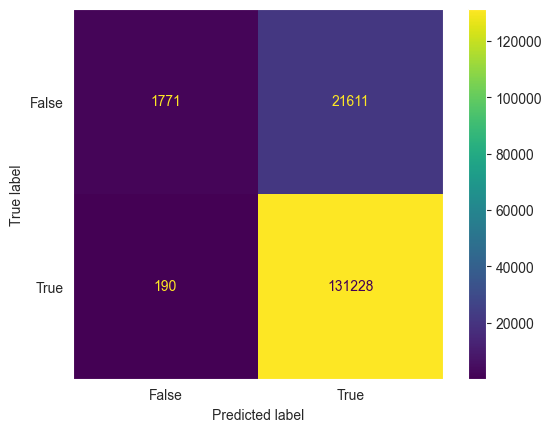

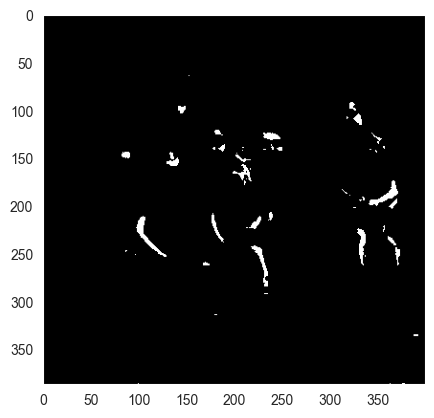

In [55]:
for name in list_of_photos:
    bayes_classifier_function(name, clf)